In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from collections import OrderedDict
plt.style.use(['fivethirtyeight'])

# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(RNG_SEED)

In [35]:
PATH = os.getcwd()

train_path = os.path.join(PATH,'C:/Users/M PRAVEEN/OneDrive/AMRITA/steel/cp_train.csv')
val_path = os.path.join(PATH, 'C:/Users/M PRAVEEN/OneDrive/AMRITA/steel/cp_val.csv')
test_path = os.path.join(PATH,'C:/Users/M PRAVEEN/OneDrive/AMRITA/steel/cp_test.csv')

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print(f'df_train DataFrame shape: {df_train.shape}')
print(f'df_val DataFrame shape: {df_val.shape}')
print(f'df_test DataFrame shape: {df_test.shape}')

df_train DataFrame shape: (5190, 4)
df_val DataFrame shape: (1501, 4)
df_test DataFrame shape: (725, 4)


In [36]:
df_train_sampled = df_train.sample(n=4929, random_state=RNG_SEED)
df_val_sampled = df_val.sample(n=1453, random_state=RNG_SEED)
df_test_sampled = df_test.sample(n=702, random_state=RNG_SEED)

print(f'df_train_sampled DataFrame shape: {df_train_sampled.shape}')
print(f'df_val_sampled DataFrame shape: {df_val_sampled.shape}')
print(f'df_test_sampled DataFrame shape: {df_test_sampled.shape}')

df_train_sampled DataFrame shape: (4929, 4)
df_val_sampled DataFrame shape: (1453, 4)
df_test_sampled DataFrame shape: (702, 4)


In [37]:
# Import the package and the generate_features fun
import CBFV 

In [38]:
from CBFV import composition


In [39]:
print('DataFrame column names before renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)


DataFrame column names before renaming:
Index(['formula', 'gap pbe', 'bulk modulus', 'shear modulus'], dtype='object')
Index(['formula', 'gap pbe', 'bulk modulus', 'shear modulus'], dtype='object')
Index(['formula', 'gap pbe', 'bulk modulus', 'shear modulus'], dtype='object')


In [40]:
rename_dict = {'bulk modulus': 'target',
'formula':'formula'}
df_train = df_train.rename(columns=rename_dict)
df_val = df_val.rename(columns=rename_dict)
df_test = df_test.rename(columns=rename_dict)

df_train_sampled = df_train_sampled.rename(columns=rename_dict)
df_val_sampled = df_val_sampled.rename(columns=rename_dict)
df_test_sampled = df_test_sampled.rename(columns=rename_dict)

print('\n DataFrame column names after renaming:')
print(df_train.columns)
print(df_val.columns)
print(df_test.columns)


 DataFrame column names after renaming:
Index(['formula', 'gap pbe', 'target', 'shear modulus'], dtype='object')
Index(['formula', 'gap pbe', 'target', 'shear modulus'], dtype='object')
Index(['formula', 'gap pbe', 'target', 'shear modulus'], dtype='object')


In [41]:
X_train_unscaled, y_train, formulae_train, skipped_train = composition.generate_features(df_train_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = composition.generate_features(df_val_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = composition.generate_features(df_test_sampled, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Processing Input Data: 100%|██████████| 4929/4929 [00:01<00:00, 3918.46it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4929/4929 [00:02<00:00, 2464.21it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 1453/1453 [00:00<00:00, 17132.80it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1453/1453 [00:00<00:00, 9522.14it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 702/702 [00:00<00:00, 16367.33it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 702/702 [00:00<00:00, 7736.29it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


In [42]:
X_train_unscaled.head(7000)

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,gap pbe,shear modulus
0,43.0,90.844803,8.0,41.0,19.0,1.0,2.0,0.0,235.0,4.0,...,85.05,0.00143,0.440,0.22259,3.2698,0.02674,79.0,0.84,1.1254,55.189027
1,58.0,129.887039,8.0,22.0,9.0,2.0,0.0,0.0,132.0,3.0,...,2740.15,2.70000,0.242,10.79000,293.4000,150.00000,326.0,3.39,0.0000,102.224707
2,211.0,512.138619,20.0,39.0,17.0,4.0,0.0,0.0,249.0,7.0,...,3353.15,19.30000,0.128,12.55000,334.4000,317.00000,366.0,3.81,0.0000,14.586118
3,122.0,271.856380,16.0,50.0,23.0,2.0,2.0,0.0,298.0,5.0,...,717.85,2.07000,0.710,1.71750,9.8000,0.26900,279.0,2.85,0.0000,26.519926
4,39.0,79.372039,9.0,29.0,13.0,2.0,1.0,0.0,219.0,2.0,...,1363.15,1.74000,0.710,8.95400,127.4000,148.00000,148.0,1.51,0.0000,31.968228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,79.0,168.743278,14.0,43.0,18.0,4.0,0.0,0.0,259.0,6.0,...,2740.15,2.70000,0.900,10.79000,293.4000,237.00000,326.0,3.39,0.0000,116.661835
4925,95.0,215.094739,15.0,64.0,29.0,2.0,3.0,0.0,349.0,7.0,...,90.15,0.00143,0.920,0.22259,3.4099,0.02674,249.0,2.62,0.0000,93.313390
4926,145.0,329.831350,18.0,37.0,17.0,3.0,1.0,0.0,214.0,7.0,...,3413.15,12.00000,0.240,17.60000,357.0000,71.80000,378.0,3.89,0.0000,49.984064
4927,59.0,123.093200,12.0,39.0,19.0,2.0,2.0,0.0,226.0,4.0,...,90.15,0.00143,0.920,0.22259,3.4099,0.02674,249.0,2.62,2.8989,70.210256


In [43]:
X_train_unscaled.shape

(4929, 310)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [45]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)


In [46]:
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [47]:
from time import time

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [48]:
def instantiate_model(model_name):
    model = model_name()
    return model

def fit_model(model, X_train, y_train):
    ti = time()
    model = instantiate_model(model)
    model.fit(X_train, y_train)
    fit_time = time() - ti
    return model, fit_time

def evaluate_model(model, X, y_act):
    y_pred = model.predict(X)
    r2 = r2_score(y_act, y_pred)
    mae = mean_absolute_error(y_act, y_pred)
    rmse_val = mean_squared_error(y_act, y_pred, squared=False)
    return r2, mae, rmse_val

def fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_act_val):
    model, fit_time = fit_model(model, X_train, y_train)
    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_act_val)
    result_dict = {
        'model_name': model_name,
        'model_name_pretty': type(model).__name__,
        'model_params': model.get_params(),
        'fit_time': fit_time,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    return model, result_dict

def append_result_df(df, result_dict):
    df_result_appended = df.append(result_dict, ignore_index=True)
    return df_result_appended

def append_model_dict(dic, model_name, model):
    dic[model_name] = model
    return dic

In [49]:
df_classics = pd.DataFrame(columns=['model_name',
                                    'model_name_pretty',
                                    'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


In [50]:
# Build a dictionary of model names
classic_model_names = OrderedDict({
    'dumr': DummyRegressor,
    'rr': Ridge,
    'abr': AdaBoostRegressor,
    'gbr': GradientBoostingRegressor,
    'rfr': RandomForestRegressor,
    'etr': ExtraTreesRegressor,
    'svr': SVR,
    'lsvr': LinearSVR,
    'knr': KNeighborsRegressor,
})

In [51]:
# Instantiate a dictionary to store the model objects
classic_models = OrderedDict()

# Keep track of elapsed time
ti = time()

# Loop through each model type, fit and predict, and evaluate and store results
for model_name, model in classic_model_names.items():
    print(f'Now fitting and evaluating model {model_name}: {model.__name__}')
    model, result_dict = fit_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
    df_classics = append_result_df(df_classics, result_dict)
    classic_models = append_model_dict(classic_models, model_name, model)

dt = time() - ti
print(f'Finished fitting {len(classic_models)} models, total time: {dt:0.2f} s')

Now fitting and evaluating model dumr: DummyRegressor


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model rr: Ridge


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model abr: AdaBoostRegressor


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model gbr: GradientBoostingRegressor


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model rfr: RandomForestRegressor


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model etr: ExtraTreesRegressor


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model svr: SVR


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)
C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Now fitting and evaluating model lsvr: LinearSVR
Now fitting and evaluating model knr: KNeighborsRegressor
Finished fitting 9 models, total time: 192.85 s


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


In [52]:
# Sort in order of increasing validation r2 score
df_classics = df_classics.sort_values('r2_val', ignore_index=True)
df_classics


,model_name,model_name_pretty,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,dumr,DummyRegressor,"{'constant': None, 'quantile': None, 'strategy...",0.204895,0.0,62.644541,96.750919,-0.006126,61.006882,73.156517
1,abr,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",10.336217,0.593659,49.461295,61.673745,0.280943,49.906215,61.845574
2,svr,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",4.696421,0.390373,30.116138,75.541746,0.669498,29.427881,41.928925
3,knr,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.001995,0.586259,19.898779,62.232805,0.682784,23.978325,41.077521
4,lsvr,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.106811,0.405257,30.337858,74.61392,0.696095,29.059932,40.206475
5,gbr,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",38.284976,0.949593,15.334479,21.722039,0.738829,18.753474,37.272548
6,rfr,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",93.759062,0.914139,6.142721,28.350054,0.822216,14.836334,30.752008
7,rr,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",1.835959,0.505876,23.259767,68.010029,0.824957,21.943451,30.513986
8,etr,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",30.187916,1.0,0.0,0.0,0.855574,13.627039,27.717243


In [53]:
def plot_pred_act(act, pred, model, reg_line=True, label=''):
    xy_max = np.max([np.max(act), np.max(pred)])

    plot = plt.figure(figsize=(6,6))
    plt.plot(act, pred, 'o', ms=9, mec='k', mfc='yellow', alpha=0.4)
    plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
    if reg_line:
        polyfit = np.polyfit(act, pred, deg=1)
        reg_ys = np.poly1d(polyfit)(np.unique(act))
        plt.plot(np.unique(act), reg_ys, alpha=0.8, label='linear fit')
    plt.axis('scaled')
    plt.xlabel(f'Actual {label}')
    plt.ylabel(f'Predicted {label}')
    plt.title(f'{type(model).__name__}, r2: {r2_score(act, pred):0.4f}')
    plt.legend(loc='upper left')
    
    return plot

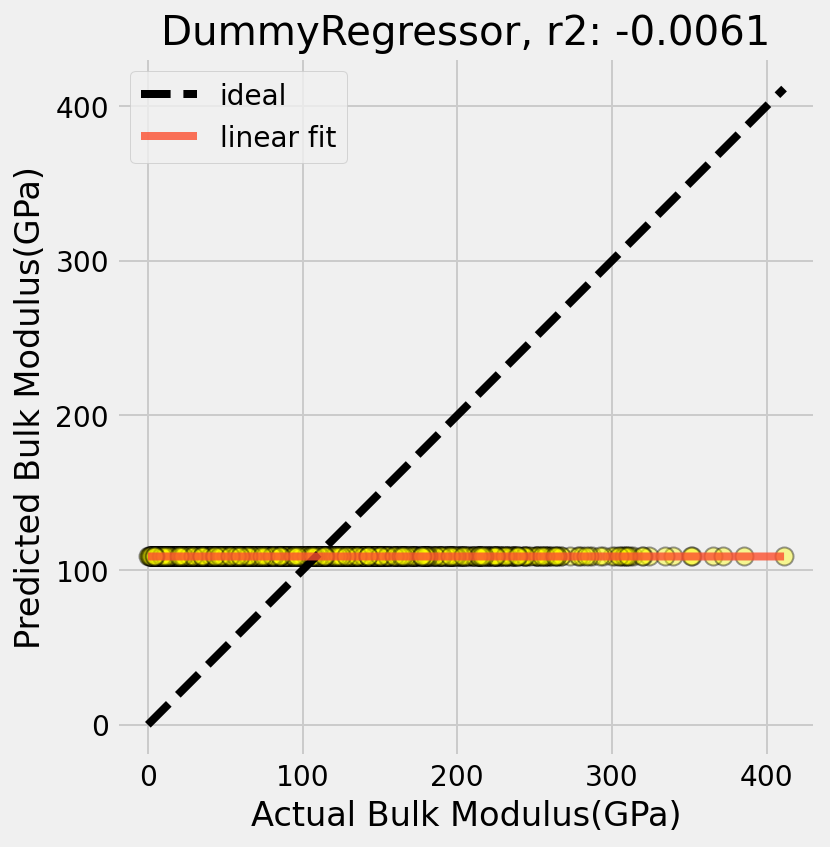

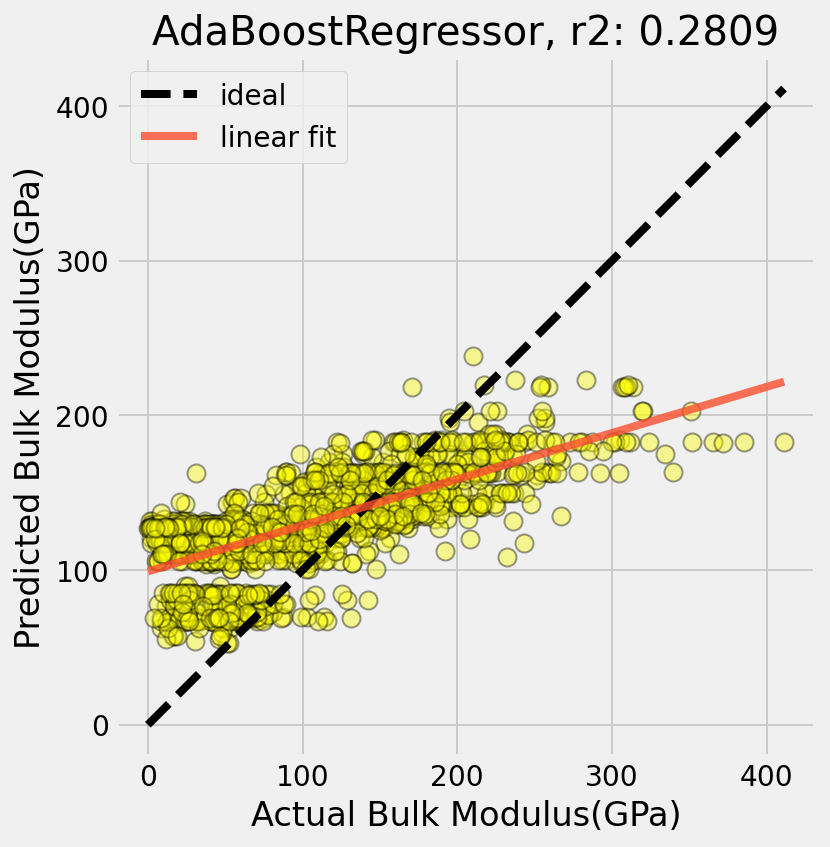

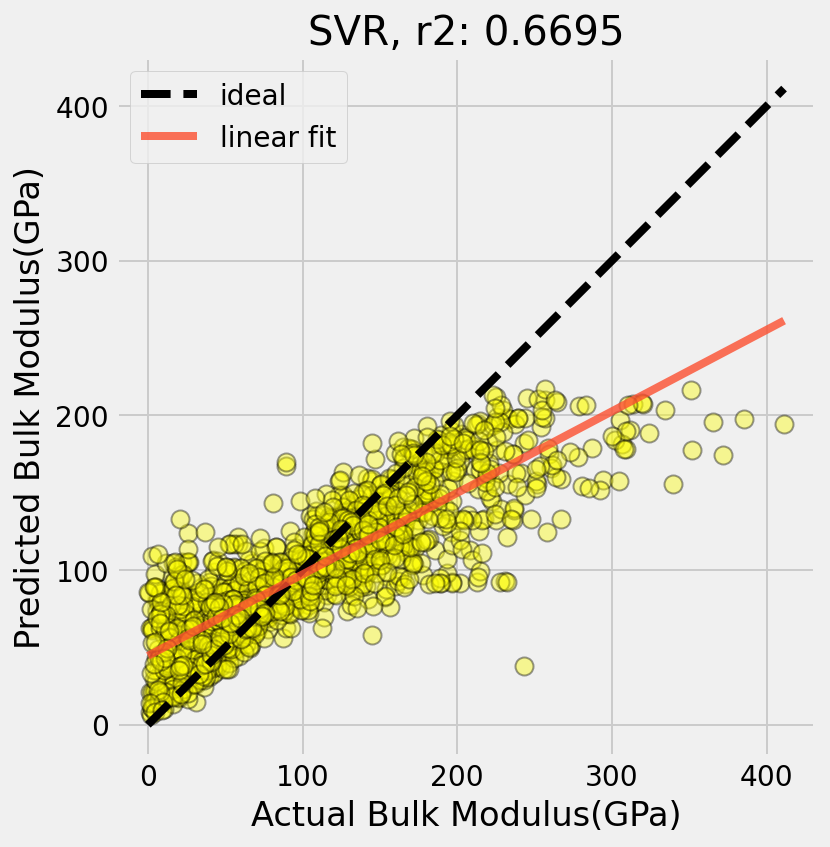

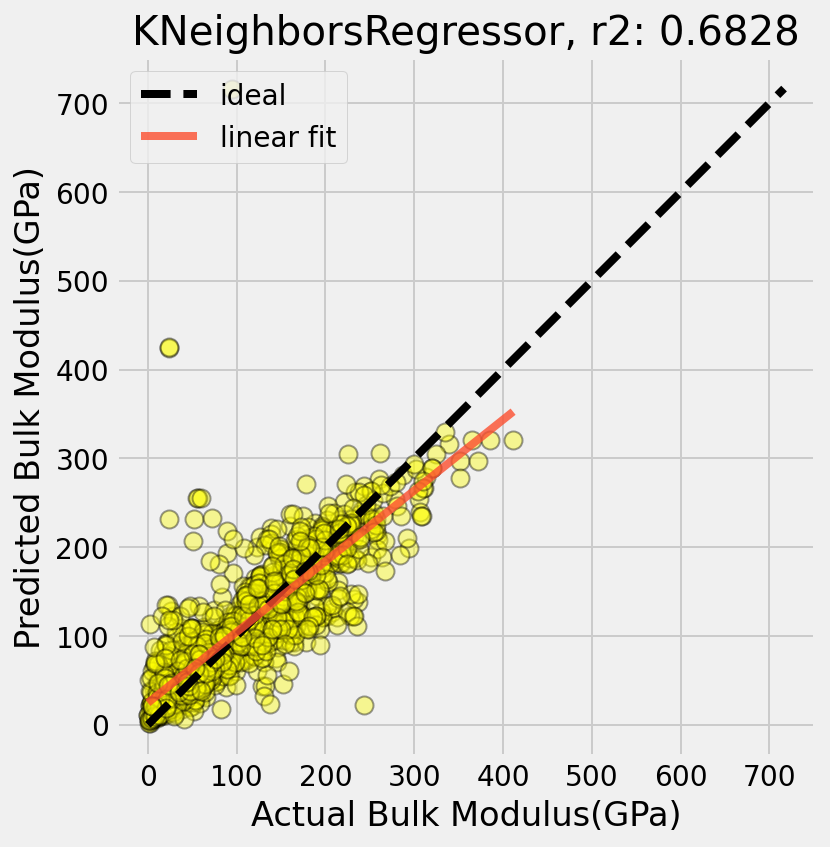

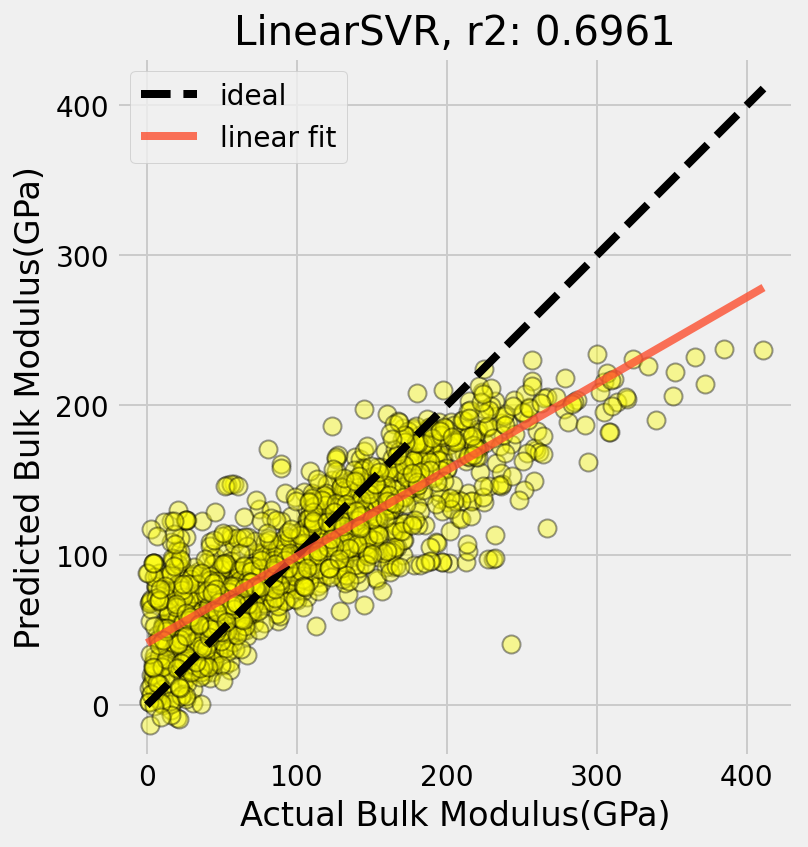

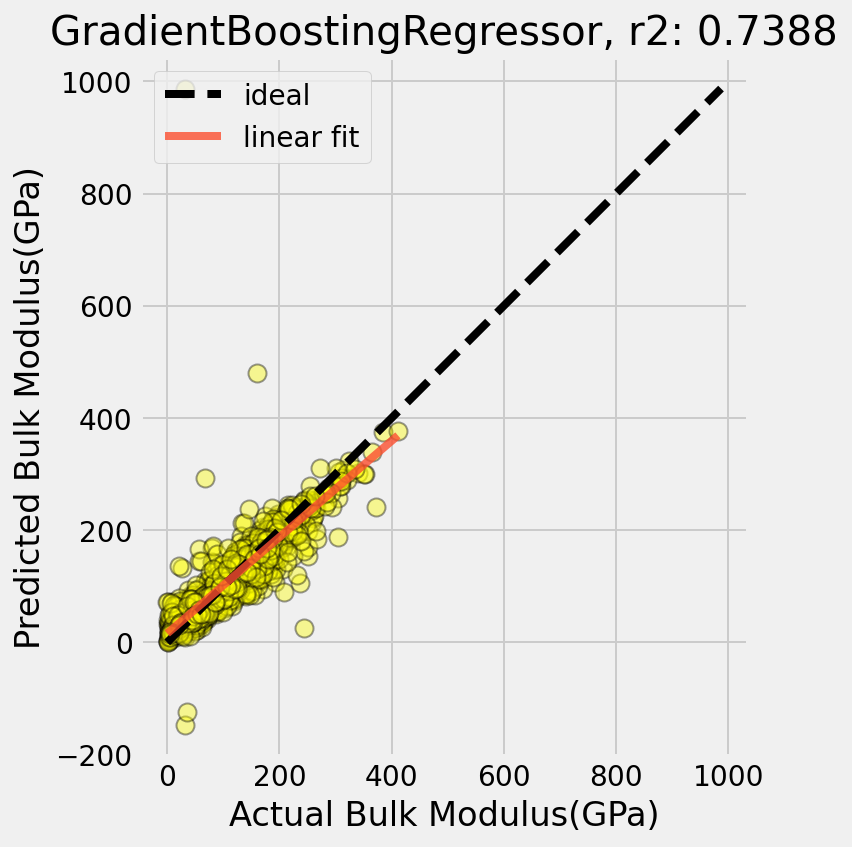

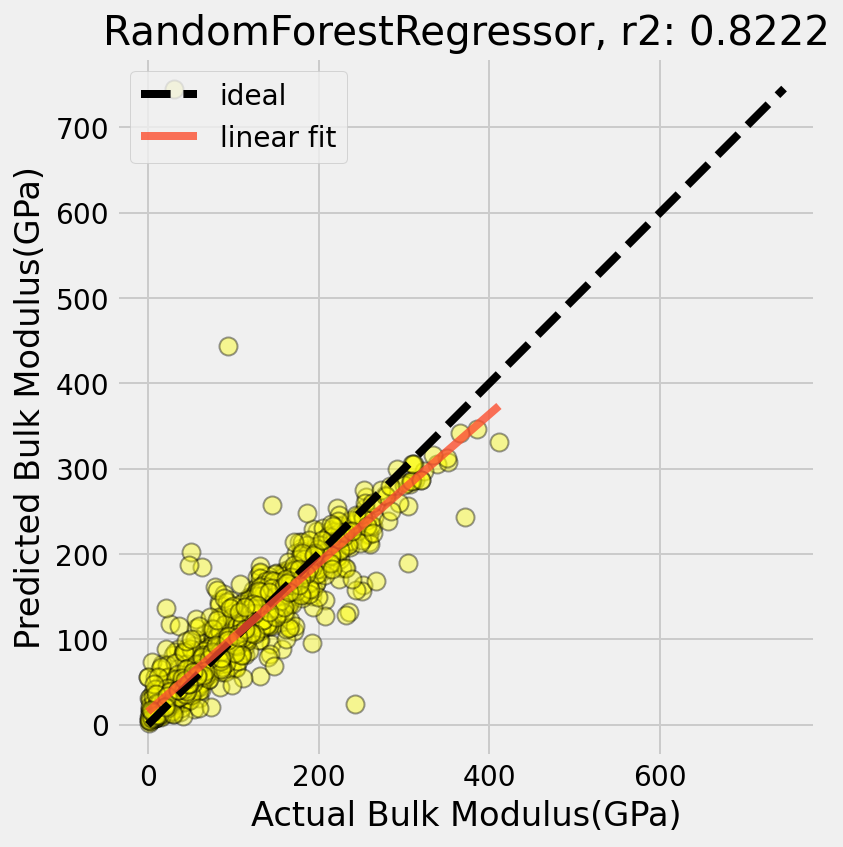

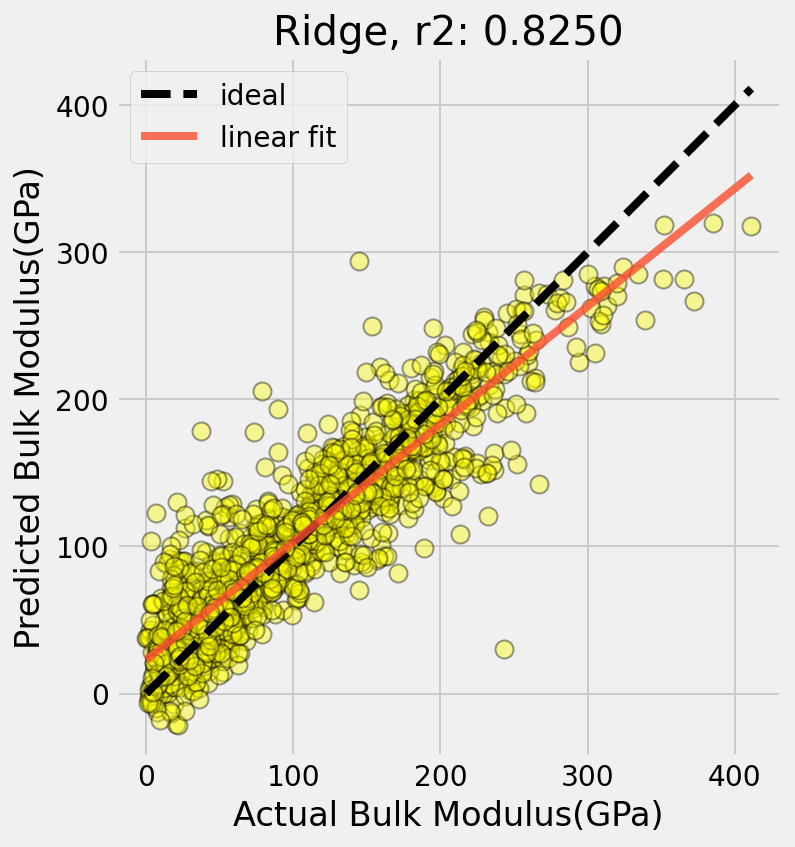

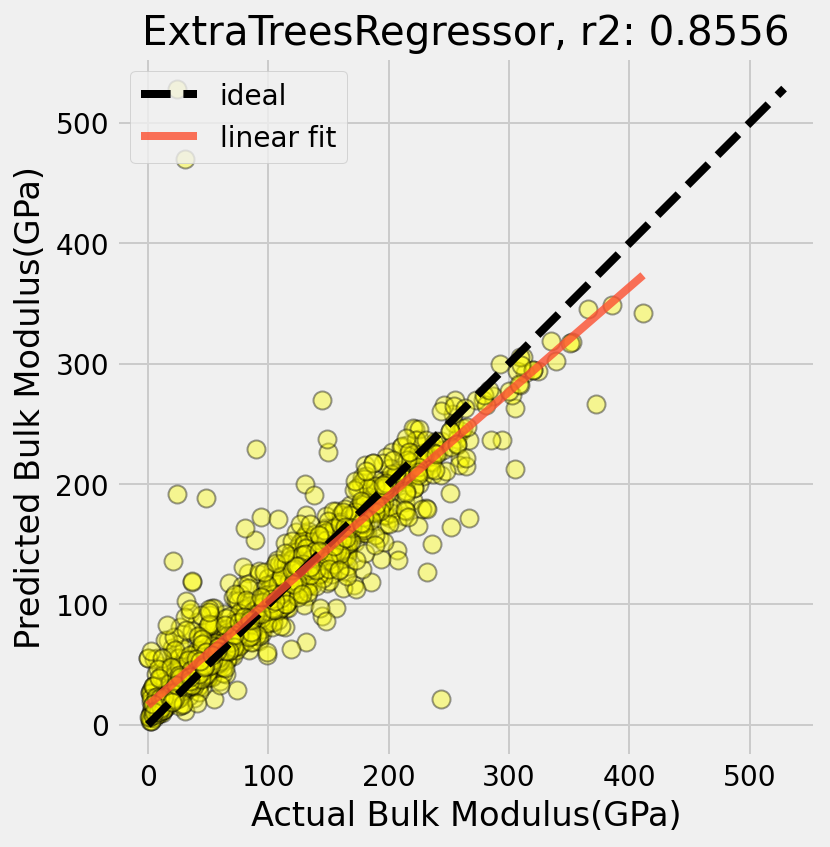

In [54]:
for row in range(df_classics.shape[0]):
    model_name = df_classics.iloc[row]['model_name']

    model = classic_models[model_name]
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    plot = plot_pred_act(y_act_val, y_pred_val, model, reg_line=True, label='Bulk Modulus(GPa)')

In [55]:
y_pred_val.shape

(1453,)

In [56]:
# Find the best-performing model that we have tested
best_row = df_classics.iloc[-1, :].copy()

# Get the model type and model parameters
model_name = best_row['model_name']
model_params = best_row['model_params']

# Instantiate the model again using the parameters
model = classic_model_names[model_name](**model_params)
print(model)

ExtraTreesRegressor()


In [57]:
# Concatenate the train and validation datasets together
X_train_new = np.concatenate((X_train, X_val), axis=0)
y_train_new = pd.concat((y_train, y_val), axis=0)

print(X_train_new.shape)

(6382, 310)


In [58]:
ti = time()

model.fit(X_train_new, y_train_new)

dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

Finished fitting best model, total time: 38.89 s


r2: 0.8540
mae: 13.0939
rmse: 28.0791


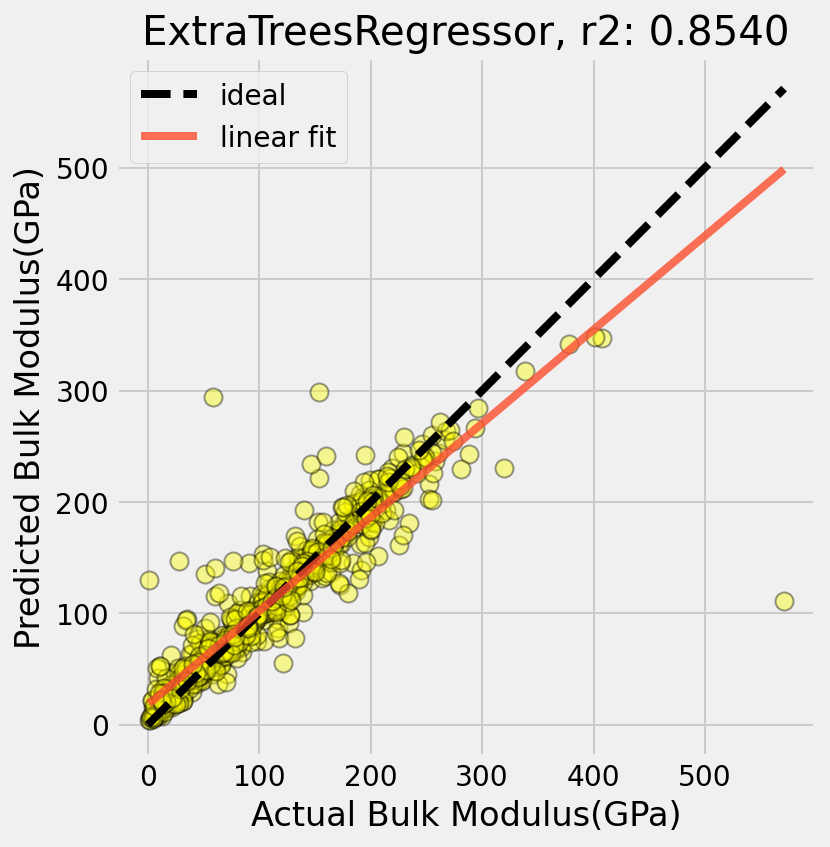

In [59]:
y_act_test = y_test
y_pred_test = model.predict(X_test)

r2, mae, rmse = evaluate_model(model, X_test, y_test)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')

plot = plot_pred_act(y_act_test, y_pred_test, model, reg_line=True, label='Bulk Modulus(GPa)')


In [60]:
X_train_unscaled, y_train, formulae_train, skipped_train = composition.generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_val_unscaled, y_val, formulae_val, skipped_val = composition.generate_features(df_val, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test_unscaled, y_test, formulae_test, skipped_test = composition.generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Processing Input Data: 100%|██████████| 5190/5190 [00:00<00:00, 20065.81it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 5190/5190 [00:00<00:00, 10619.55it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 1501/1501 [00:00<00:00, 20066.14it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1501/1501 [00:00<00:00, 11064.24it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 725/725 [00:00<00:00, 20192.37it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 725/725 [00:00<00:00, 10849.63it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


In [61]:
X_train_original = X_train_unscaled.copy()
X_val = X_val_unscaled.copy()
X_test = X_test_unscaled.copy()

y_train_original = y_train.copy()

In [62]:
splits = range(10)
df_splits = pd.DataFrame(columns=['split',
                                  'r2_train',
                                  'mae_train',
                                  'rmse_train',
                                  'r2_val',
                                  'mae_val',
                                  'rmse_val'])

for split in splits:
    print(f'Fitting and evaluating random split {split}')
    X_train = X_train_original.sample(frac=0.7, random_state=split)
    y_train = y_train_original[X_train.index]

    scaler = StandardScaler()
    X_train = normalize(scaler.fit_transform(X_train))
    X_val = normalize(scaler.transform(X_val_unscaled))
    X_test = normalize(scaler.transform(X_test_unscaled))
    
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    y_act_val = y_val
    y_pred_val = model.predict(X_val)

    r2_train, mae_train, rmse_train = evaluate_model(model, X_train, y_train)
    r2_val, mae_val, rmse_val = evaluate_model(model, X_val, y_val)
    result_dict = {
        'split': split,
        'r2_train': r2_train,
        'mae_train': mae_train,
        'rmse_train': rmse_train,
        'r2_val': r2_val,
        'mae_val': mae_val,
        'rmse_val': rmse_val}
    
    df_splits = append_result_df(df_splits, result_dict)

Fitting and evaluating random split 0


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 1


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 2


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 3


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 4


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 5


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 6


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 7


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 8


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


Fitting and evaluating random split 9


C:\Users\M PRAVEEN\AppData\Local\Temp\ipykernel_9828\2440609463.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result_appended = df.append(result_dict, ignore_index=True)


In [63]:
df_splits['split'] = df_splits['split'].astype(int)
df_splits

,split,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val
0,0,0.807648,34.252659,42.964416,0.650585,34.365498,43.028663
1,1,0.441441,65.563707,77.691391,-0.633862,67.230892,93.045365
2,2,0.689744,46.471417,57.685575,0.37882,47.263063,57.371461
3,3,0.703949,37.381577,44.941909,0.60374,38.506979,45.822337
4,4,0.780566,37.74119,46.309163,0.583719,38.951981,46.965652
5,5,0.746498,43.009064,52.227152,0.466154,44.582205,53.185712
6,6,0.792614,36.571419,46.877286,0.587712,36.973157,46.739885
7,7,0.656994,48.94479,60.355554,0.286144,49.967436,61.502456
8,8,0.819728,30.359345,37.574873,0.70814,31.342848,39.325534
9,9,0.726162,38.309267,45.642034,0.594268,39.227029,46.366779


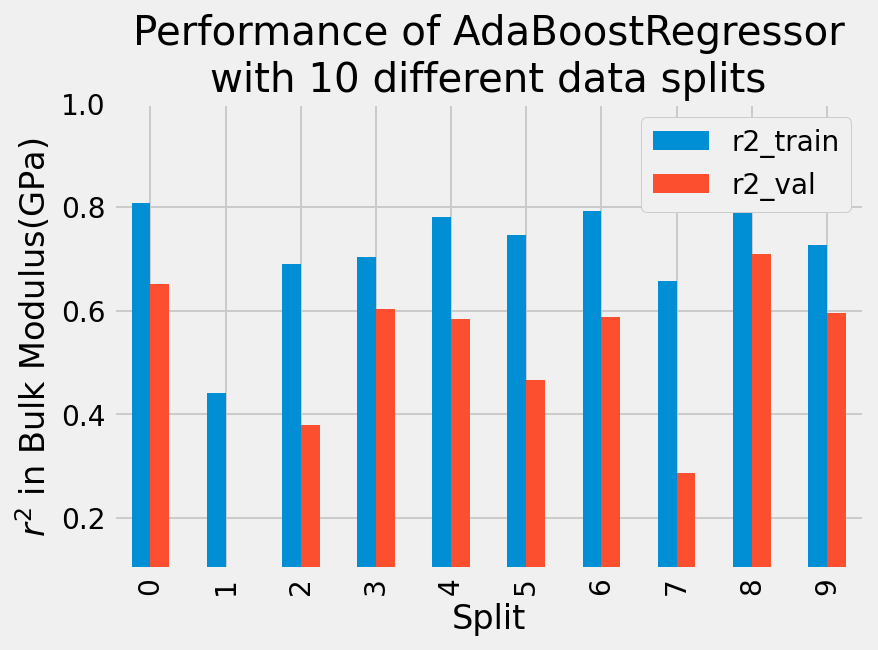

In [64]:
df_splits.plot('split', ['r2_train', 'r2_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylim(0.1, 1.0)
plt.ylabel('$r^2$ in Bulk Modulus(GPa)')
plt.xlabel('Split')
plt.legend(loc='upper right', framealpha=1)
plt.show()

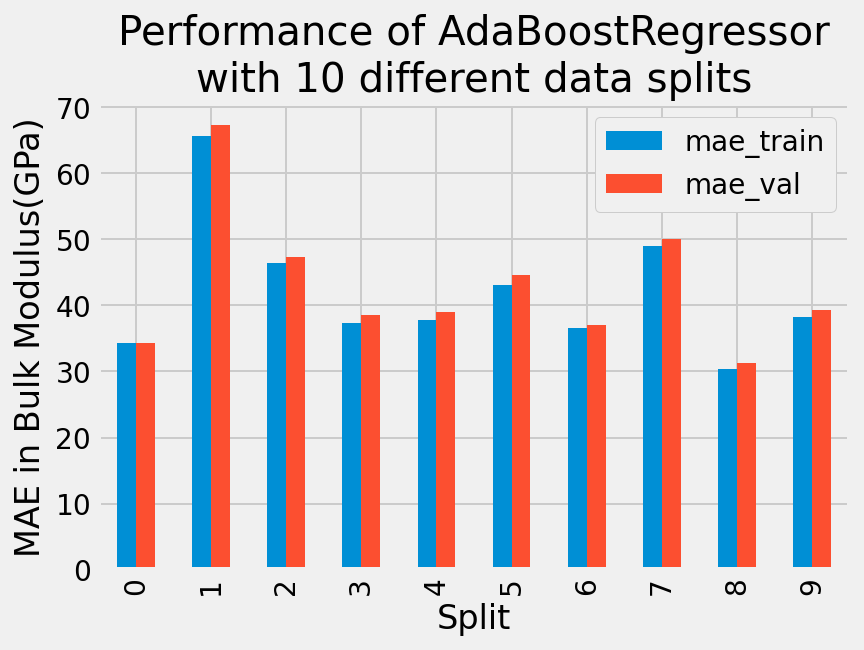

In [65]:
df_splits.plot('split', ['mae_train', 'mae_val'], kind='bar')
plt.title(f'Performance of {type(model).__name__}\nwith {len(splits)} different data splits')
plt.ylabel('MAE in Bulk Modulus(GPa)')
plt.xlabel('Split')
plt.legend(loc='upper right', framealpha=1)
plt.show()

In [66]:
avg_r2_val = df_splits['r2_val'].mean()
avg_mae_val = df_splits['mae_val'].mean()

print(f'Average validation r2: {avg_r2_val:0.4f}')
print(f'Average validation MAE: {avg_mae_val:0.4f}')

Average validation r2: 0.4225
Average validation MAE: 42.8411
